# Brazilian E-Commerce Project

### About the Dataset:

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. 

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

### Importing the relevant libraries

In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
pd.set_option('display.max_columns', None)

### Customers Dataset:
This dataset has information about the customer and its location

In [114]:
customers = pd.read_csv("olist_customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [125]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Orders Dataset:
Information about the orders

In [115]:
orders = pd.read_csv("olist_orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [126]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### Order Items Dataset
This dataset includes data about the items purchased within each order.

In [116]:
items = pd.read_csv("olist_order_items_dataset.csv")
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [127]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


### Payments Dataset
This dataset contains information about the payment methods used for each order. 
There can be multiple payment methods and separate payment installations for each order.

In [117]:
payments = pd.read_csv("olist_order_payments_dataset.csv")
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [128]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


### Order Reviews Dataset
This dataset includes data about the reviews made by the customers.

After a customer purchases the product from Olist Store a seller gets notified to fulfill that order. 
Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey by email where he can give a note for the purchase experience and write down some comments.

In [118]:
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [129]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


#### There are a lot of null values in the review_comment_title and review_comment_message columns

### Geolocation Dataset
This dataset has information Brazilian zip codes and its latitude/longitude coordinates.

In [119]:
geolocations = pd.read_csv("olist_geolocation_dataset.csv")
geolocations.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [130]:
geolocations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


### Sellers Dataset
This dataset includes data about the sellers.

In [120]:
sellers = pd.read_csv("olist_sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [131]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


### Products Dataset
This dataset includes data about the products sold by Olist.

In [121]:
products = pd.read_csv("olist_products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [132]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


### Product Category Name Translations Dataset:
This dataset contains translations of each product category from Portuguese to English.

In [122]:
name_translations = pd.read_csv("product_category_name_translation.csv")
name_translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [133]:
name_translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


## This is the Data Schema

This schema shows how I connected the datasets through common keys.

<img src="https://i.imgur.com/HRhd2Y0.png">

## The cities with the most orders

#### Merging orders and customers tables

In [123]:
order_customers = orders.merge(customers, on = 'customer_id')
order_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


#### Checking for duplicates in the order_id column

In [124]:
order_customers.duplicated('order_id').sum()

0

#### Checking which cities have the largest number of orders.

In [66]:
cities = pd.DataFrame(order_customers.groupby('customer_city').size()).reset_index()
cities.columns= ['city','number of orders']
cities = cities.sort_values('number of orders', ascending=False)
cities = cities.reset_index(drop=True)
cities

,city,number of orders
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
...,...,...
4114,ibiara,1
4115,rio espera,1
4116,rio dos indios,1
4117,rio dos cedros,1


### We have 4119 cities and I choose the top 10

In [67]:
cities = cities[:10]
cities

,city,number of orders
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


### Making a bar plots with the top 10 cities with the most orders

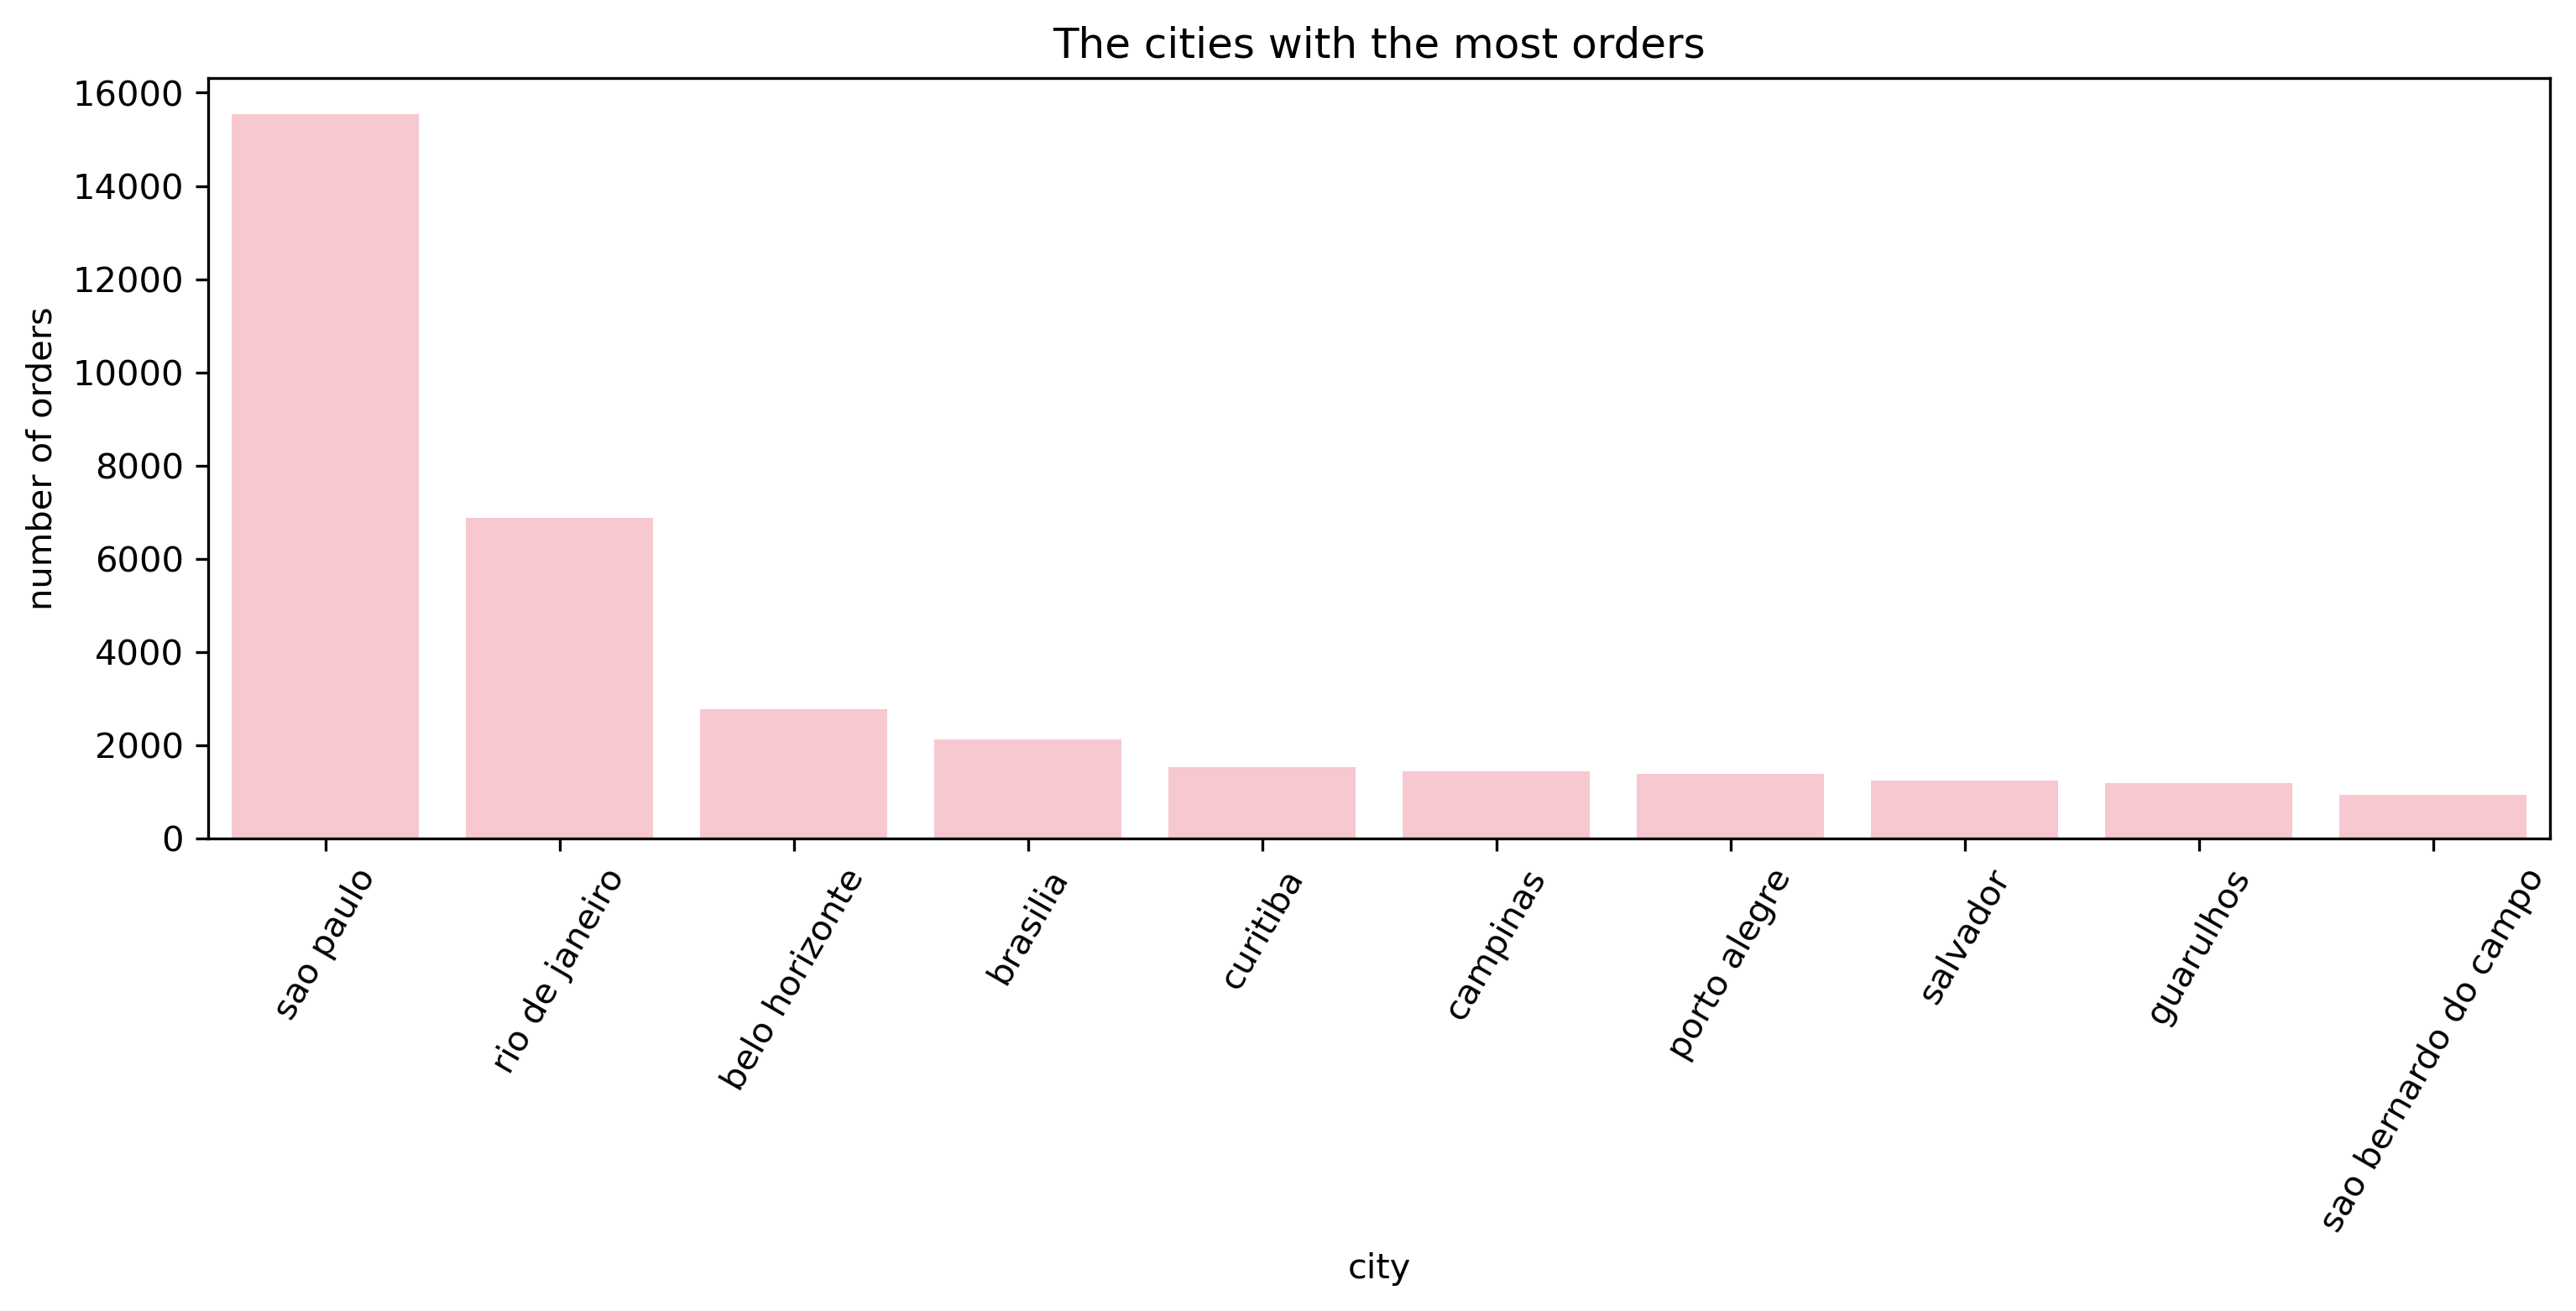

In [111]:
fig, axes = plt.subplots(1, 1, figsize=(12, 4), dpi=300)
sns.barplot(data= cities , ax = axes , x='city' , y= 'number of orders' , color = 'pink'  )
axes.tick_params(axis="x", labelrotation=60)
axes.set_title("The cities with the most orders")
plt.savefig("most_orders_city.png");

### The city with the biggest number of orders is Sao Paulo with 15,540 orders.

## Who are the customers that paid the most and where are coming from?

#### merging  order customers and payments tables

In [69]:
order_customers_payment = order_customers.merge(payments, on='order_id')

In [70]:
order_customers_payment

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,credit_card,3,179.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,1,credit_card,3,85.08
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,1,credit_card,3,195.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,1,credit_card,5,271.01
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,1,credit_card,4,441.16


In [71]:
customers_payments = order_customers_payment.groupby(['customer_id','customer_city','customer_state'])['payment_value'].sum()

In [72]:
customers_payments = pd.DataFrame(customers_payments).reset_index()
customers_payments

,customer_id,customer_city,customer_state,payment_value
0,00012a2ce6f8dcda20d059ce98491703,osasco,SP,114.74
1,000161a058600d5901f007fab4c27140,itapecerica,MG,67.41
2,0001fd6190edaaf884bcaf3d49edf079,nova venecia,ES,195.42
3,0002414f95344307404f0ace7a26f1d5,mendonca,MG,179.35
4,000379cdec625522490c315e70c7a9fb,sao paulo,SP,107.01
...,...,...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,parobe,RS,81.36
99436,fffeda5b6d849fbd39689bb92087f431,rio de janeiro,RJ,63.13
99437,ffff42319e9b2d713724ae527742af25,taboao da serra,SP,214.13
99438,ffffa3172527f765de70084a7e53aae8,alfenas,MG,45.50


### Checking who is the customer that his payment value is the highest

In [106]:
customers_payments = customers_payments.sort_values('payment_value', ascending= False)
customers_payments = customers_payments[:100]

In [107]:
customers_payments

,customer_id,customer_city,customer_state,payment_value
8546,1617b1357756262bfa56ab541c47bc16,rio de janeiro,RJ,13664.08
91984,ec5b2ba62e574342386871631fafd3fc,vila velha,ES,7274.88
77521,c6e2731c5b391845f6800c97401a43a9,campo grande,MS,6929.31
95123,f48d464a0baaea338cb25f816991ab1f,vitoria,ES,6922.21
24771,3fd6777bbce08a352fddd04e4a7cc8f6,marilia,SP,6726.66
...,...,...,...,...
9132,177ba55869da8001fcca079af0b85832,joao pessoa,PB,2438.51
71460,b76816b61d8043a98db57875437da6b5,barra mansa,RJ,2429.68
16898,2b7ae7a532ff538ce88f6bfdd2cb564c,curitiba,PR,2419.20
18882,30ab7e538292e6130a456c371778d595,araguari,MG,2416.00


### The customer who paid the most is from rio de janeiro ,RJ and his payment value is 13664.08

## The top states with the high payment customers 

Text(0.5, 1.0, 'The top states with the high payment customers ')

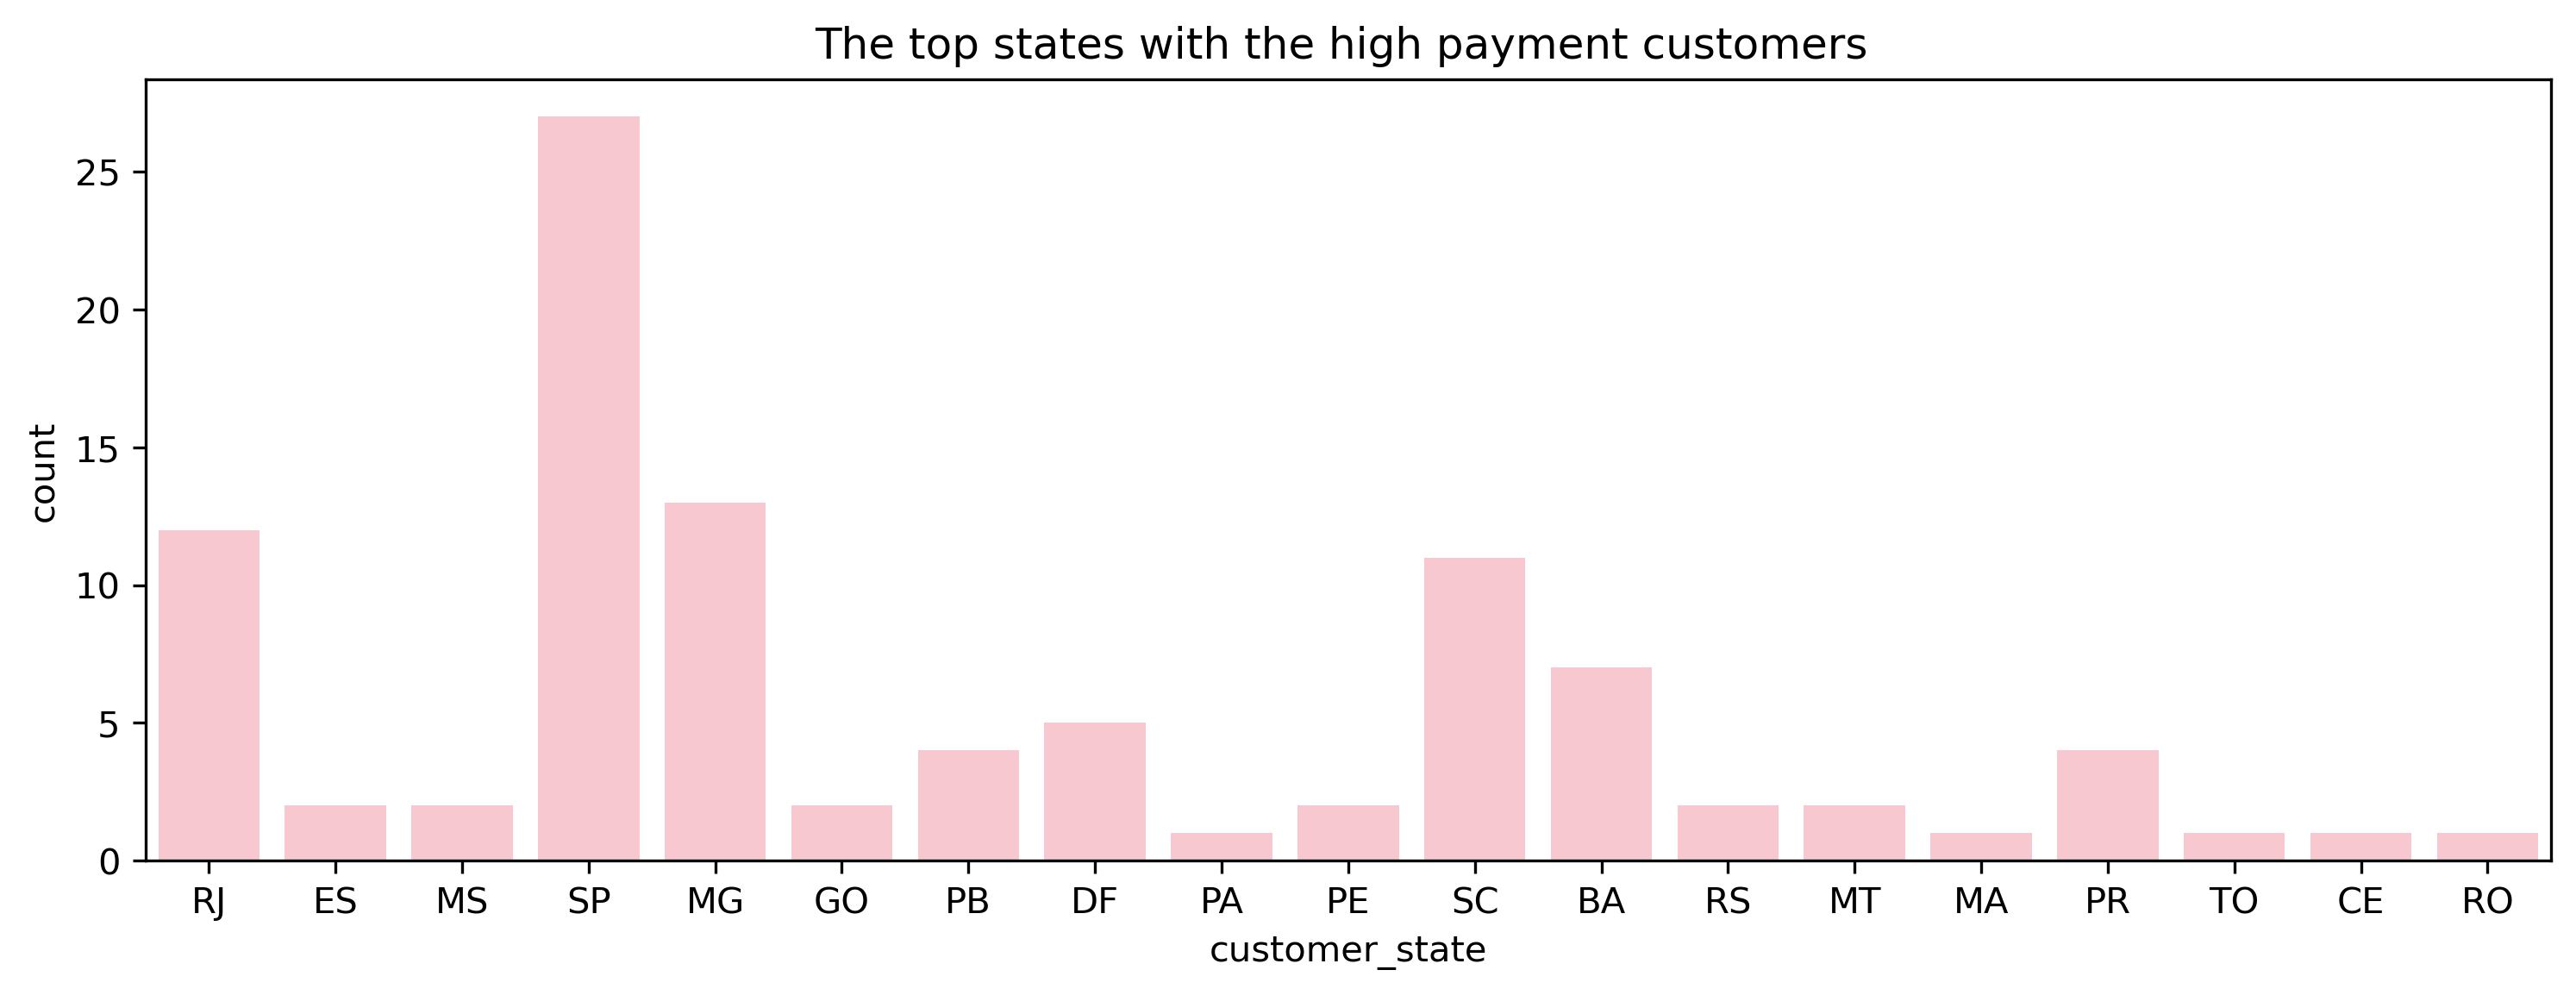

In [109]:
fig, axes = plt.subplots(1, 1, figsize=(12, 4), dpi=300)
sns.countplot(data= customers_payments, x='customer_state', ax= axes , color = 'pink')
axes.set_title("The top states with the high payment customers ")

### After taking the top 100 paying customers we see that most of them are coming from SP.

#### Merging orders , items and products libraries

In [88]:
orders_products = orders.merge(items, on='order_id').\
merge(products, on='product_id').\
merge(name_translations, on='product_category_name')

In [89]:
orders_products

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-31 02:14:11,29.99,14.10,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,6ea2f835b4556291ffdc53fa0b3b95e8,c7340080e394356141681bd4c9b8fe31,delivered,2017-11-24 21:27:48,2017-11-25 00:21:09,2017-12-13 21:14:05,2017-12-28 18:59:23,2017-12-21 00:00:00,1,be021417a6acb56b9b50d3fd2714baa8,f5f46307a4d15880ca14fab4ad9dfc9b,2017-11-30 00:21:09,339.00,17.12,utilidades_domesticas,48.0,664.0,6.0,14300.0,38.0,34.0,34.0,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111018,0b82d0616f1ad8da15cf967b984b4004,986632b40c38f4240caf8608cb01d40d,delivered,2018-08-03 21:35:53,2018-08-04 04:25:14,2018-08-08 14:26:00,2018-08-09 21:42:08,2018-08-10 00:00:00,1,4a24717893a6c8f3cfcf9843b8987d15,2cb6eb1b7185064167657fa09f541105,2018-08-07 04:25:14,25.00,8.69,artes_e_artesanato,36.0,576.0,5.0,350.0,32.0,2.0,28.0,arts_and_craftmanship
111019,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,1,9c313adb4b38a55b092f53f83f78be9e,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,19.00,12.86,artes_e_artesanato,32.0,660.0,3.0,500.0,16.0,6.0,16.0,arts_and_craftmanship
111020,2ef4a11b6e24fdfbb43b92cb5f95edff,ee1cfdc92e449920e25d3ca4ab4da4f6,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,2,eacb104882d39ffb53140b1d1860a7c3,ef728fa1f17436c91ed1ccd03dcf9631,2018-07-30 09:17:39,39.90,12.87,artes_e_artesanato,57.0,942.0,5.0,500.0,21.0,7.0,14.0,arts_and_craftmanship
111021,2c4ada2e75c2ad41dd93cebb5df5f023,363d3a9b2ec5c5426608688ca033292d,delivered,2017-01-26 11:09:00,2017-01-26 11:22:17,2017-01-27 14:59:35,2017-02-14 16:24:01,2017-03-07 00:00:00,1,6c7a0a349ad11817745e3ad58abd5c79,48162d548f5b1b11b9d29d1e01f75a61,2017-01-30 11:09:00,183.29,25.77,seguros_e_servicos,55.0,506.0,1.0,1225.0,27.0,35.0,15.0,security_and_services


In [90]:
categories_in_orders = orders_products.groupby('product_category_name_english').size()

In [91]:
categories_in_orders = pd.DataFrame(categories_in_orders).reset_index()
categories_in_orders.columns = ['category name', 'count category in orders']
categories_in_orders

,category name,count category in orders
0,agro_industry_and_commerce,212
1,air_conditioning,297
2,art,209
3,arts_and_craftmanship,24
4,audio,364
...,...,...
66,stationery,2517
67,tablets_printing_image,83
68,telephony,4545
69,toys,4117


In [94]:
top_10_category = categories_in_orders.sort_values('count category in orders', ascending=False)[:10];

In [95]:
top_10_category

,category name,count category in orders
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
49,housewares,6964
70,watches_gifts,5991
68,telephony,4545
42,garden_tools,4347
5,auto,4235


### The top 10 categories

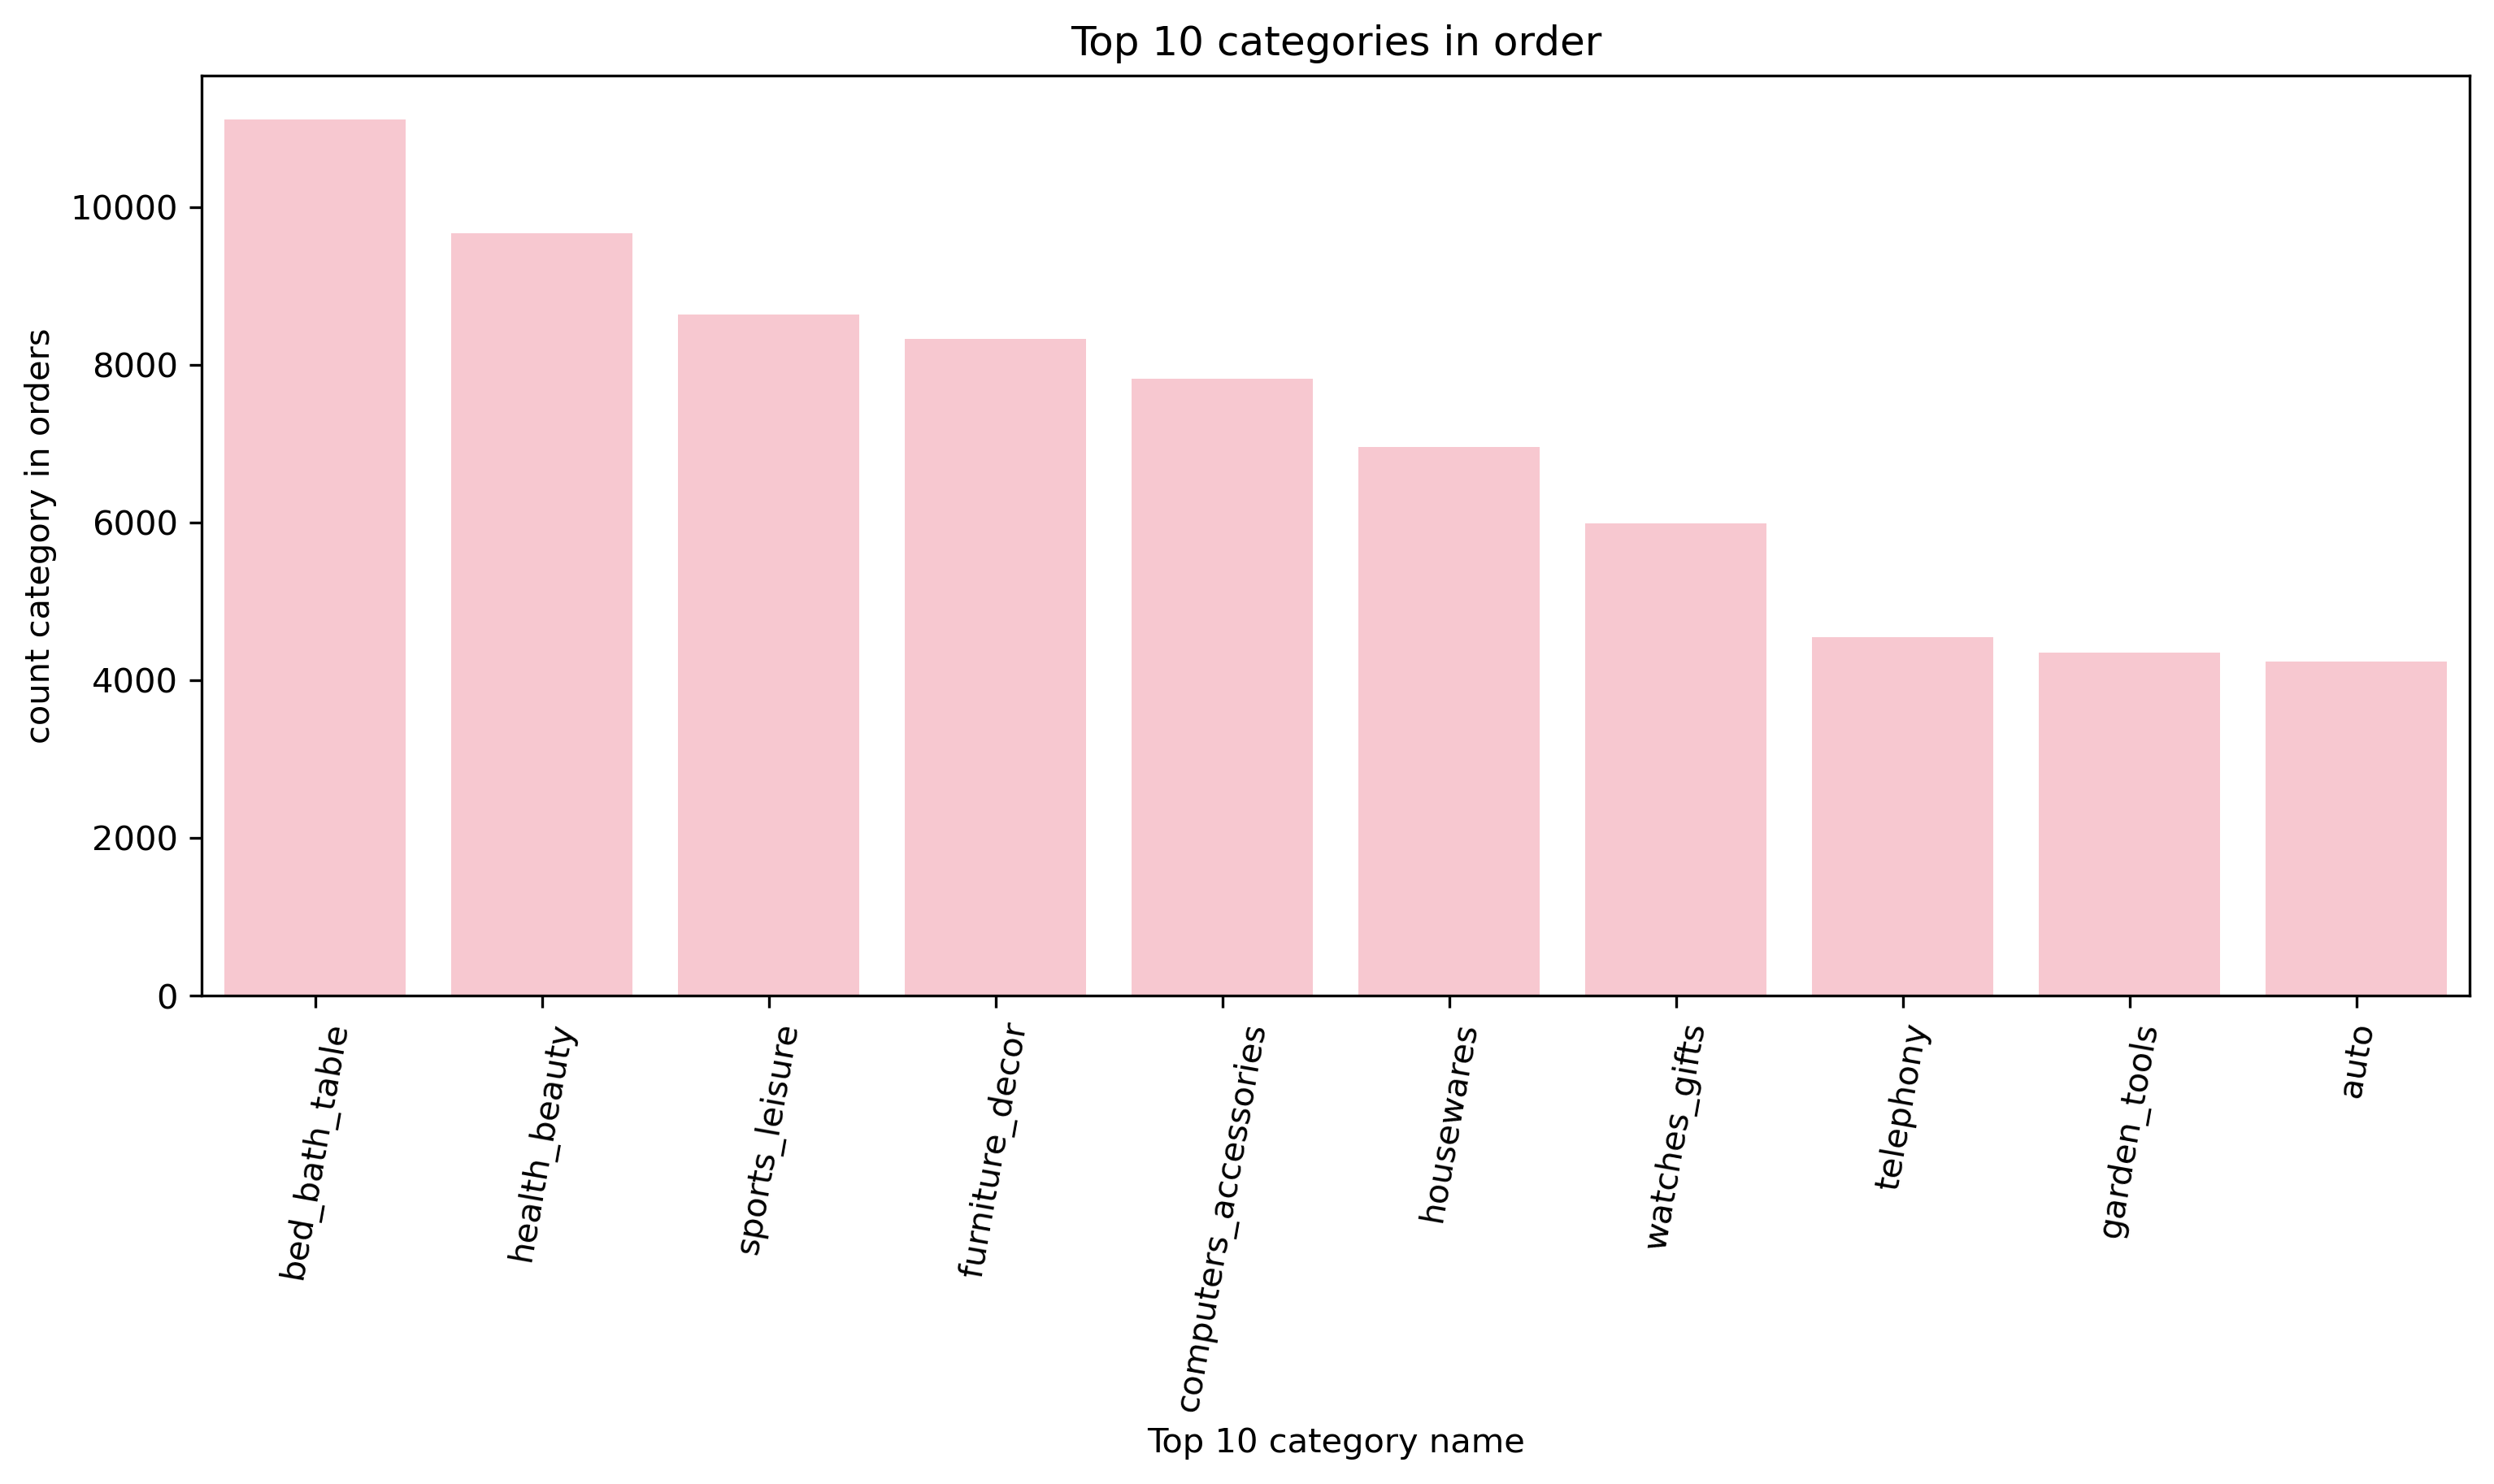

In [110]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5), dpi=300)
sns.barplot(data= top_10_category , ax = axes , x='category name' , y= 'count category in orders' , color = 'pink'  )
axes.tick_params(axis="x", labelrotation=80)
axes.set_title("Top 10 categories in order")
axes.set_xlabel('Top 10 category name')
plt.savefig("top10category.png");

### The category with the most orders is bed bath table with 11115 orders.

#### Now I am checking the 10 low orders categories

In [100]:
low_10_category = categories_in_orders.sort_values('count category in orders', ascending=True)[:10];

In [101]:
low_10_category

,category name,count category in orders
61,security_and_services,2
29,fashion_childrens_clothes,8
52,la_cuisine,14
11,cds_dvds_musicals,14
3,arts_and_craftmanship,24
46,home_comfort_2,30
32,fashion_sport,30
35,flowers,33
55,music,38
41,furniture_mattress_and_upholstery,38


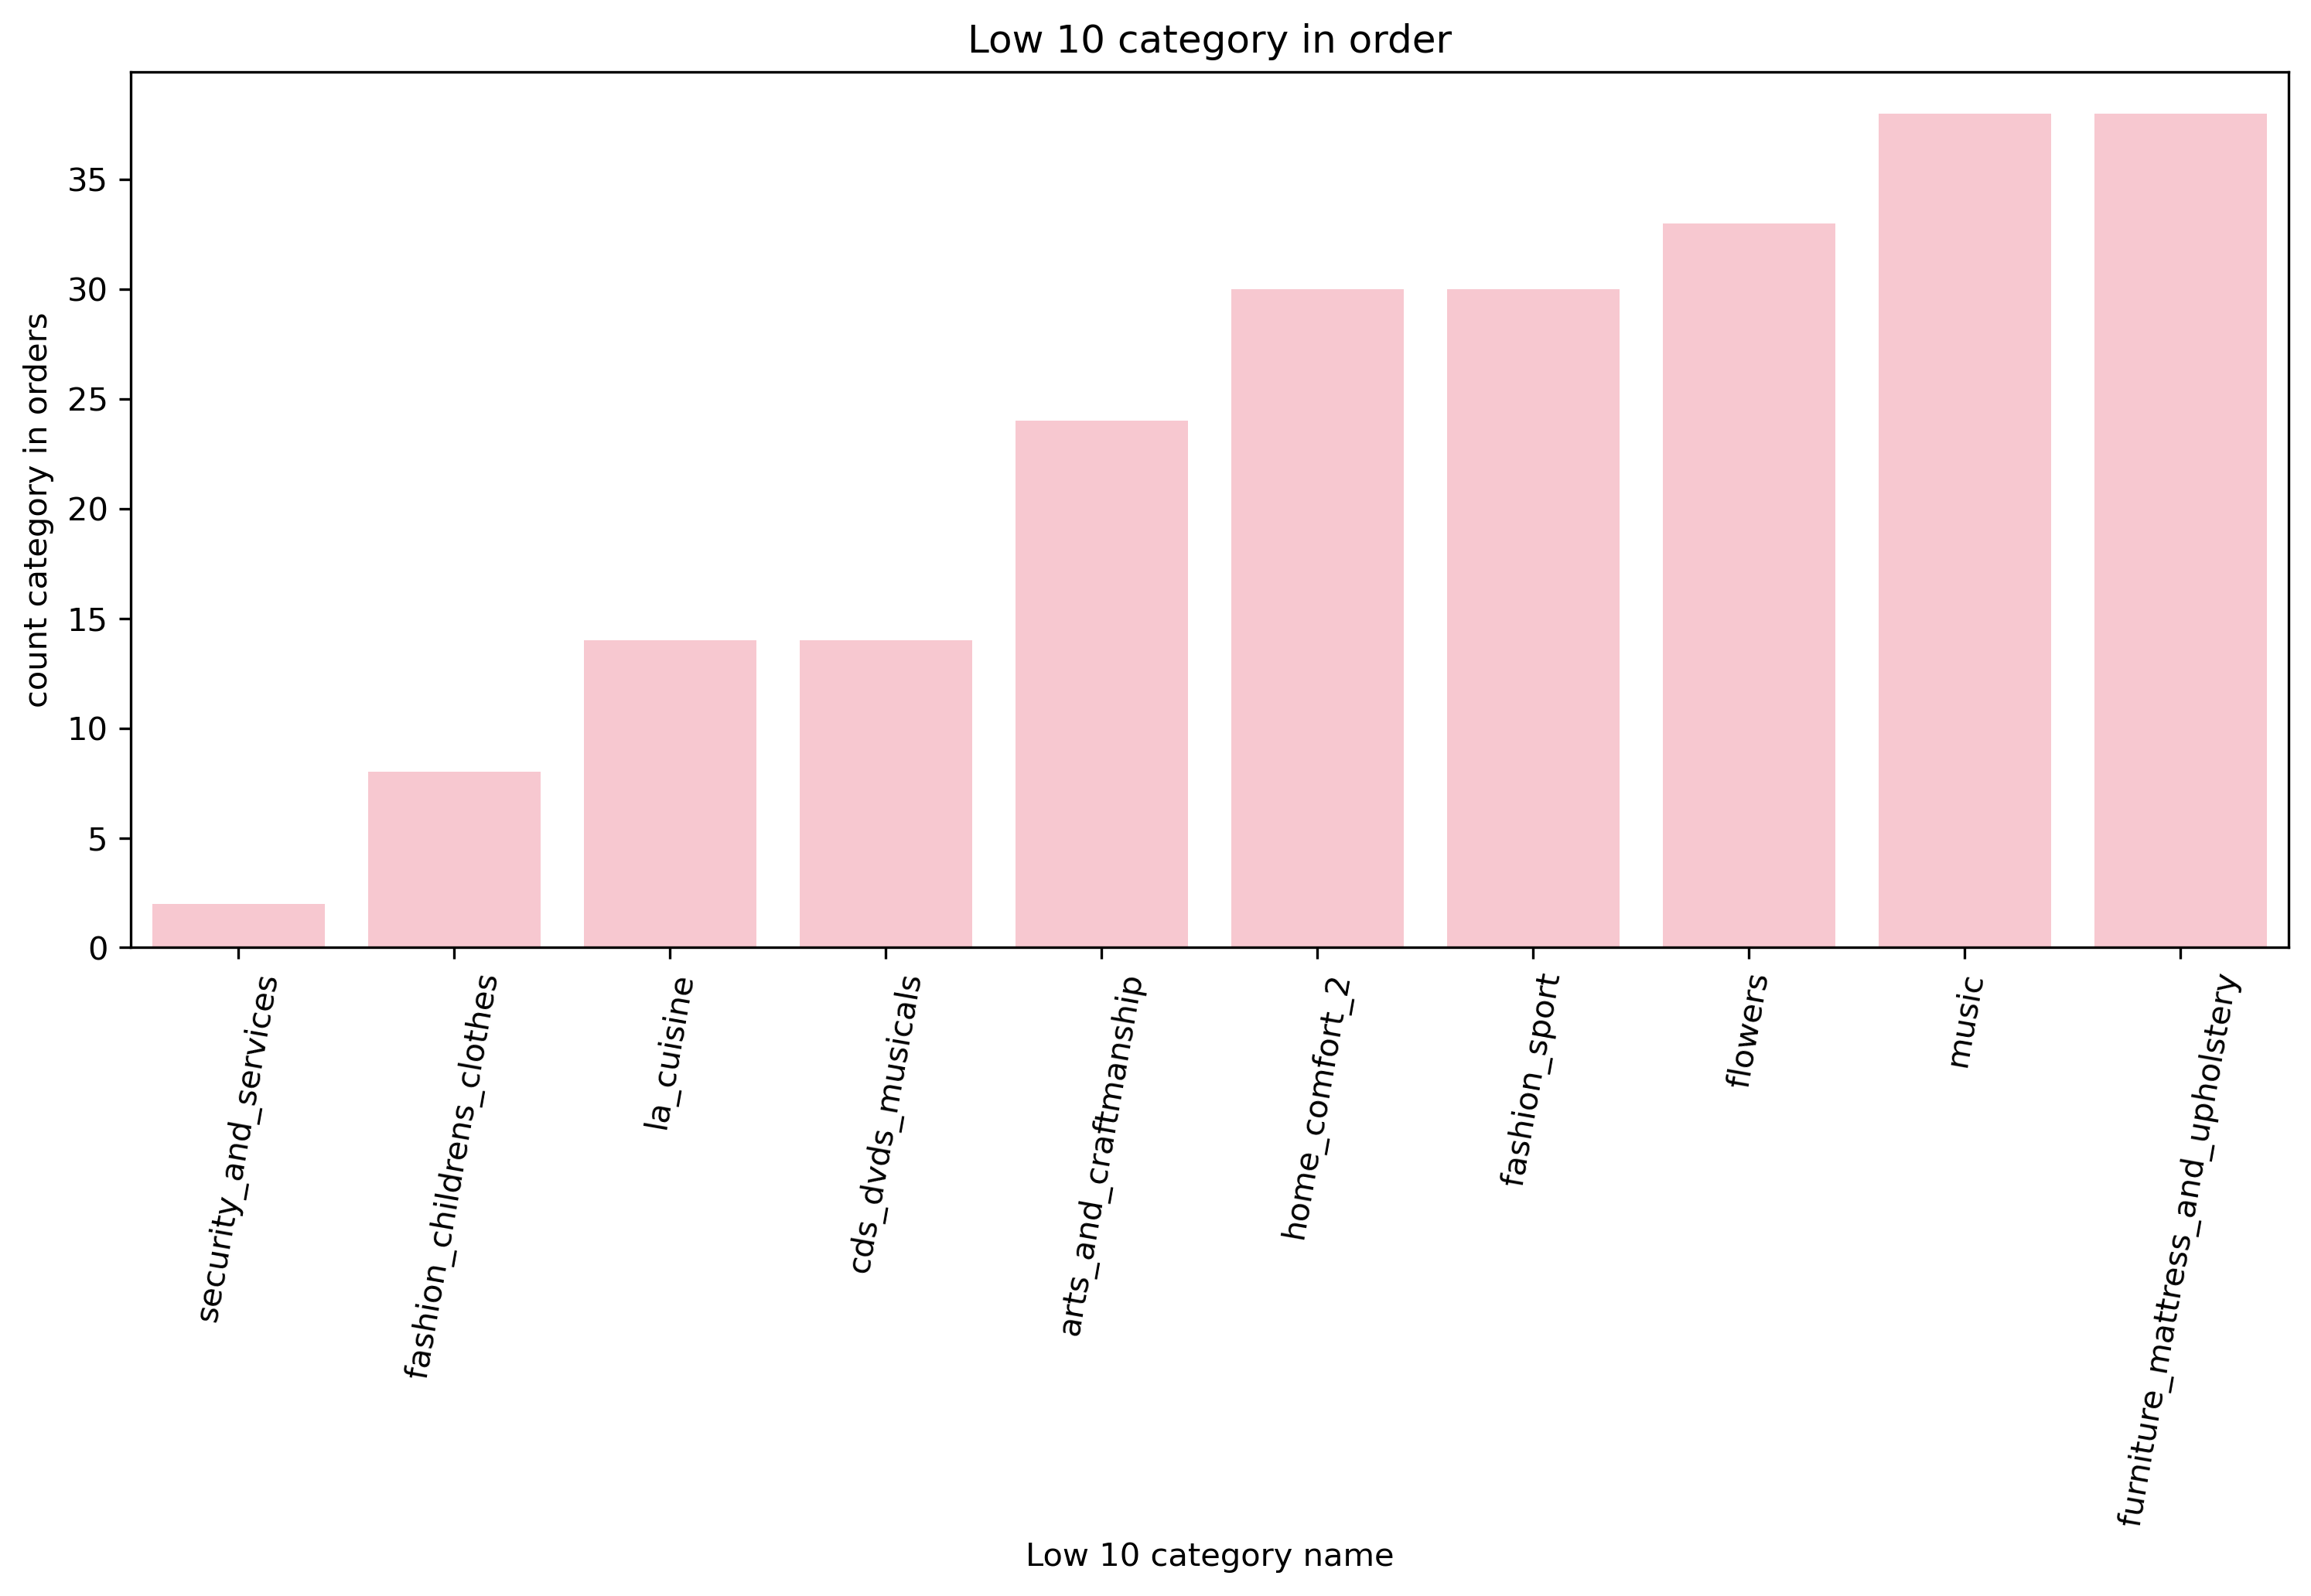

In [102]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5), dpi=300)
sns.barplot(data= low_10_category , ax = axes , x='category name' , y= 'count category in orders' , color = 'pink'  )
axes.tick_params(axis="x", labelrotation=80)
axes.set_title("Low 10 category in order")
axes.set_xlabel('Low 10 category name')
plt.savefig("Low10category.png");

### The category with the low number of orders is security and services with only 2 orders.

## Final conclusions:

It is interesting to note that Sao Paulo has the highest number of orders among all cities. To capitalize on this success and drive growth in other regions, it may be useful to conduct further analysis to understand the factors that contribute to the high number of orders in Sao Paulo. This could include evaluating the effectiveness of marketing and promotional efforts in the region, examining the shipping and fulfillment processes, and assessing the competitive landscape of the market. By gaining a deeper understanding of the drivers of success in Sao Paulo, we may be able to replicate and expand upon these strategies in other areas and drive overall growth for the business.


We can see that most of the paying customers come from SP.
There may be other factors at play, such as the availability of payment options. By conducting further research into the demographics and purchasing behaviors of the SP market, we may be able to identify key drivers of the high conversion rate and use that information to inform our marketing and sales strategies in other regions.


The category with the low number of orders is security and services with only 2 orders.
My suggestion is to maybe consider continuing to sell products in those categories.

